<a href="https://colab.research.google.com/github/FrancoLauri/Arg4.0/blob/main/TrabajoClase/02_02_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bloque 2 - Unidad 02 - Ajuste de datos y regresión lineal.

SciPy es una biblioteca de código abierto en Python utilizada para la computación científica y técnica. Se basa en NumPy y ofrece una amplia gama de algoritmos y herramientas para matemáticas, ciencia e ingeniería. SciPy incluye módulos para optimización, integración, interpolación, álgebra lineal, estadística, y más. Es comúnmente empleada para resolver problemas matemáticos complejos, realizar análisis de datos y llevar a cabo experimentos en áreas como el aprendizaje automático, procesamiento de señales y física. Por su funcionalidad y facilidad de uso, SciPy es fundamental en el ecosistema de Python para la investigación científica y el análisis de datos.

Documentación: https://docs.scipy.org/doc/scipy/

Código fuente: https://github.com/scipy/scipy



## Entendiendo SSE usando el valor medio

1. Generá un conjunto de 10 números al azar con distribución normal, valor medio 8 y desviación estandar 1.5.
2. Calculá el valor medio de la distribución obtenida.
3. Escribí una función que dado un valor medio propuesto, calcule SSE
para estos datos.

**Para discutir en grupo**: Para escribir el SSE necesito la incerteza (que entra en la desviación estandar) de los datos. Si no la conozco, ¿Qué hago? ¿Cómo afecta el resultado?

4. Graficá el valor de SSE en función del valor medio propuesto.
5. ¿Para qué valor la curva es mínima?

**Para pensar y probar**: ¿Cómo cambia esto si genero datos con una distribución lognormal? ¿Qué pasa si el valor medio simulado es bajo o alto?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [ ]:
np.random.seed(0)
nu = 8
sigma = 1.5
x = np.random.normal(nu, sigma, 10)

mu = np.mean(x)
print(mu)
print(x)

def sse(mu):
    return np.sum((x - mu)**2)

print(sse(mu))


9.10703475609325
[10.64607852  8.60023581  9.46810698 11.3613398  10.80133699  6.53408318
  9.42513263  7.77296419  7.84517172  8.61589775]
21.042949511256385


range(0, 20)


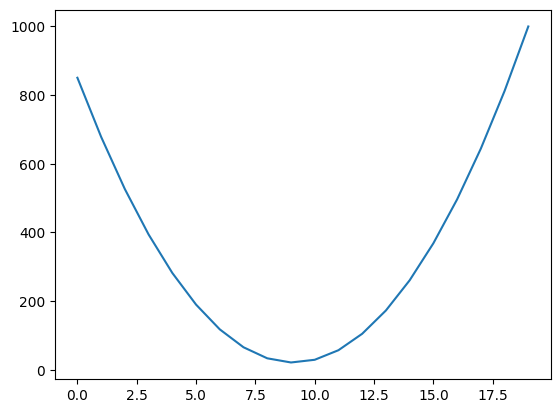

El valor minimo es:  21.157513901375808


In [ ]:
x1 = range(0,20)
print(x1)

sse1 = [sse(i) for i in x1]
plt.plot(x1, sse1)
plt.show()

print("El valor minimo es: ",min(sse1))

[16.35777332  9.40923193 11.89699258 19.84685477 17.05888435  5.38269652
 11.75959196  7.52380109  7.67209637  9.44915111]
11.635707400856177


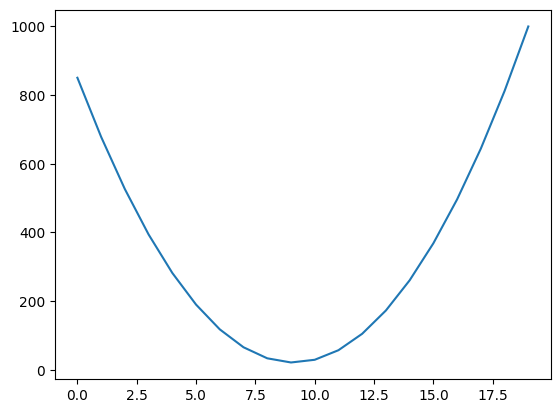

El valor minimo es:  21.157513901375808


In [ ]:
##Lognormal
np.random.seed(0)
lognormal = np.random.lognormal(np.log(nu),np.log(sigma),10)
print(lognormal)
mean = np.mean(lognormal)
print(mean)

sseLog = [sse(i) for i in x1]
plt.plot(x1,sseLog)
plt.show()
print("El valor minimo es: ",min(sseLog)) ##no cambia la distribucion usando lognormal

## Entendiendo SSE usando una recta

1. Escribí una función que dado $x$, la pendiente ($m$) y la ordenada al origen ($b$) devuelva el valor y de la recta.
2. Generá y grafica un conjunto con 10 datos.
3. Calculá la varianza de $x$ e $y$, la covarianza y el coeficiente de correlación.
4. Escribí una función que dado un valor propuesto para $m$ y $b$ calcule SSE para estos datos.
5. Fijando $b$ en el valor simulado, graficá el valor de SSE en función de $m$. Fijando $m$ en el valor simulado, graficá el valor de SSE en función de $b$.
6. Graficá el valor de SSE en función de $m$ y $b$ con un gráfico de mayor dimensionalidad.
7. Graficá los datos y el ajuste, seguidos por un gráfico en tandem (busca **subplots** en matplotlib) con los residuos. Poné como título el ${SSE}_{red}$


**Extra**: Usando [jupyter interact](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) transformá el grafico anterior en algo dinámico que te permita cambiar $m$ y $b$



*Nota*: ¿te diste cuenta que el promedio es igual a la recta pero con pendiente 0?


In [ ]:
#1)
def recta(x,m,b):
    return m*x + b

np.random.seed(2)
x = np.linspace(0,10,10)
m = 2
b = 5

y = recta(x,m,b) + np.random.normal(0,2, size = x.shape)

print(y)

[ 4.16648431  7.10968857  5.17205225 14.94720828 10.30201772 14.42761638
 19.33909617 18.06497938 20.66187334 23.18198477]


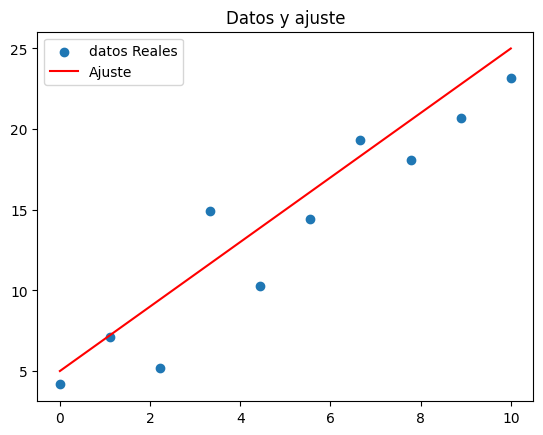

In [ ]:
#2)

plt.scatter(x,y, label = "datos Reales")
plt.plot(x,recta(x,m,b), label = "Ajuste", color="Red")
plt.title("Datos y ajuste")
plt.legend()
plt.show()

In [ ]:
#3)
varx = np.var(x)
vary = np.var(y)
print("la varianza de x es: ",varx,"la varianza de y es: ",vary)
cov = np.cov(x,y)
print("la covarianza entre ambas es: ")
print(cov)

la varianza de x es:  10.185185185185185 la varianza de y es:  40.98915099279942
la covarianza entre ambas es: 
[[11.31687243 21.46732689]
 [21.46732689 45.5435011 ]]


In [ ]:
#4)Escribí una función que dado un valor propuesto para m y b calcule SSE para estos datos

def sseMB(x,y_real,m,b):
    y_pred = recta(x,m,b)
    return np.sum((y_real - y_pred)**2)

mran = np.random.random(10)
bran = np.random.random()
print(sseMB(x,y,m,b))


60.41925939546715


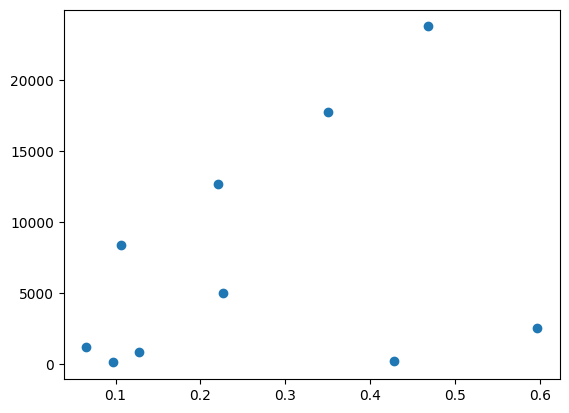

In [ ]:
#5)Fijando b en el valor simulado, graficá el valor de SSE en función de m. Fijando m en el valor simulado, graficá el valor de SSE en función de b.

m_val = np.linspace(0,10,10)
sse_m = [sseMB(x,y,m,b) for m in m_val]
plt.scatter(mran,sse_m)
plt.show()

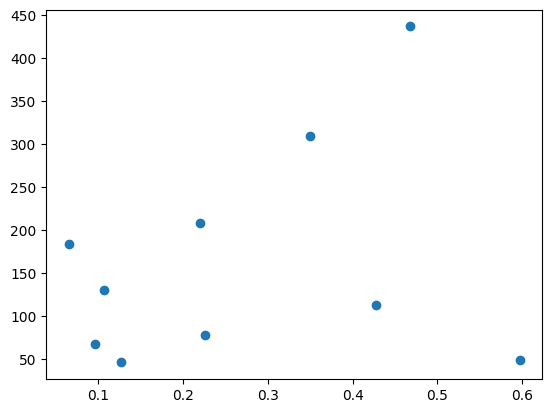

In [ ]:
b_val = np.linspace(0,10,10)
sse_m = [sseMB(x,y,m,b) for b in b_val]
plt.scatter(mran,sse_m)
plt.show()

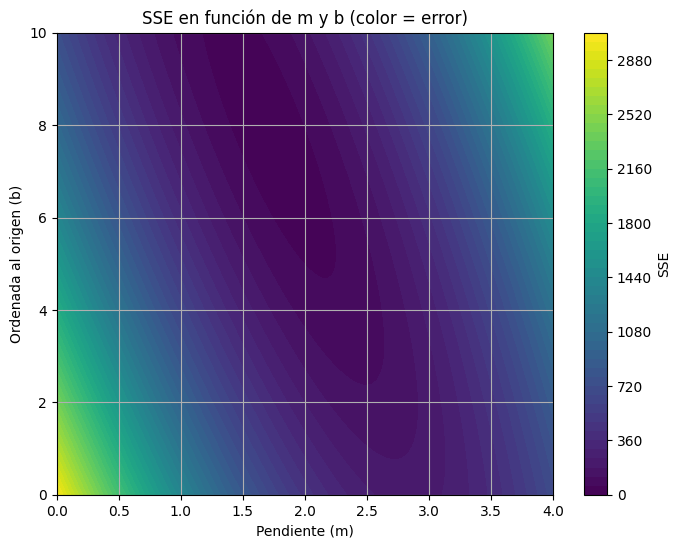

In [ ]:
#6) Graficá el valor de SSE en función de  m  y  b  con un gráfico de mayor dimensionalidad.

np.random.seed(0)
x = np.linspace(0, 10, 10)
m_real = 2
b_real = 5
y = m_real * x + b_real + np.random.normal(0, 2, size=x.shape)

# Rango de m y b
m_vals = np.linspace(0, 4, 100)
b_vals = np.linspace(0, 10, 100)

# Crear grilla
M, B = np.meshgrid(m_vals, b_vals)

# Calcular SSE para cada combinación
SSE = np.zeros_like(M)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        y_pred = M[i, j] * x + B[i, j]
        SSE[i, j] = np.sum((y - y_pred) ** 2)

# Gráfico de contorno (color como Z)
plt.figure(figsize=(8, 6))
contour = plt.contourf(M, B, SSE, levels=50, cmap='viridis')
plt.colorbar(contour, label='SSE')
plt.xlabel('Pendiente (m)')
plt.ylabel('Ordenada al origen (b)')
plt.title('SSE en función de m y b (color = error)')
plt.grid(True)
plt.show()

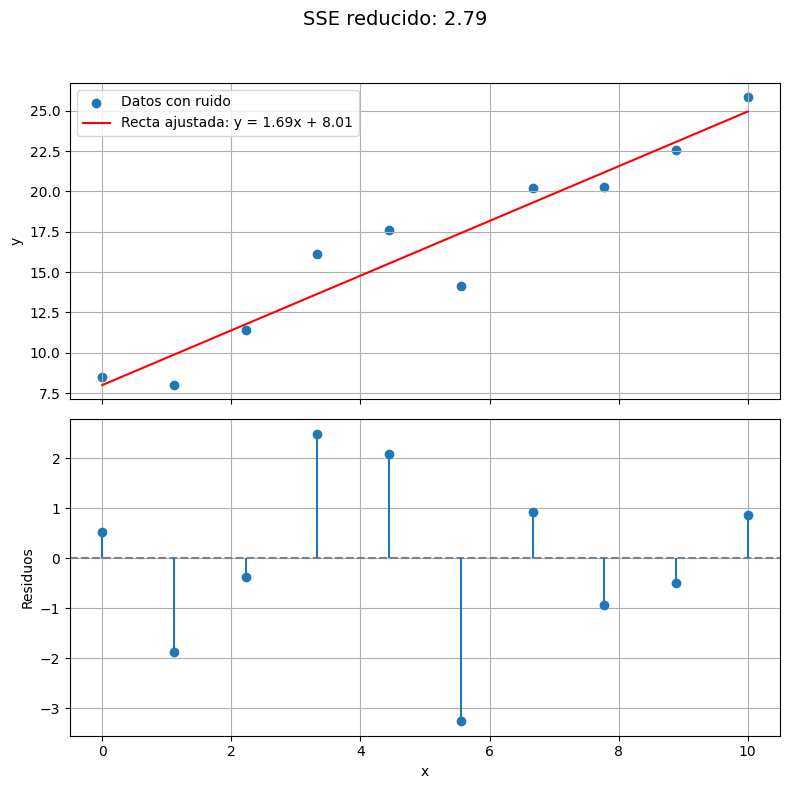

In [ ]:
#7)Graficá los datos y el ajuste, seguidos por un gráfico en tandem (busca subplots en matplotlib) con los residuos. Poné como título el  SSEred

# 1. Datos simulados
np.random.seed(0)
x = np.linspace(0, 10, 10)
m_real = 2
b_real = 5
y = m_real * x + b_real + np.random.normal(0, 2, size=x.shape)

# 2. Ajuste lineal (mínimos cuadrados)
coeffs = np.polyfit(x, y, deg=1)
m_fit, b_fit = coeffs
y_pred = m_fit * x + b_fit
residuos = y - y_pred

# 3. SSE y SSE reducido
SSE = np.sum(residuos ** 2)
SSEred = SSE / len(x)

# 4. Subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Gráfico de datos + ajuste
ax1.scatter(x, y, label="Datos con ruido")
ax1.plot(x, y_pred, color='red', label=f"Recta ajustada: y = {m_fit:.2f}x + {b_fit:.2f}")
ax1.set_ylabel("y")
ax1.legend()
ax1.grid(True)

# Gráfico de residuos
ax2.axhline(0, color='gray', linestyle='--')
ax2.stem(x, residuos, basefmt=" ")
ax2.set_xlabel("x")
ax2.set_ylabel("Residuos")
ax2.grid(True)

# Título general
fig.suptitle(f"SSE reducido: {SSEred:.2f}", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Ruido 🔊📢💥

¿Cómo cambia lo que hemos obtenido hasta ahora si agregamos ruido?

**Para pensar en grupo**:
1. ¿Qué pensás que va a pasar con el $SSE_{red}$
2. ¿Qué pensás que va a pasar con la varianza de $x$ e $y$, la covarianza y el coeficiente de correlación?

Vamos a llamar $x_{TRUE}$ e $y_{TRUE}$ a que obtenemos sin ruido como en la sección anterior. Para obtener $x$ e $y$, agregale ruido a la variable $y_{TRUE}$ con una distribución normal con media en los valores verdaderos, y una desviación estandar ($\sigma$) que elijas.

1. Repetí los puntos 3 al 7 de la sección anterior. Varía la $\sigma$ y compará lo que ves con tus respuestas a las preguntas mas arriba.
2. Si el valor de $m$ y $b$ no se corresponde con el utilizado para simular, ¿Cómo es la distribución de los residuos en función del $x$?
3. Hacé un histograma del valor de los residuos. ¿Cómo cambia con $\sigma$?

**Para discutir**: ¿Qué utilidad tiene el parámetro seed en este caso?



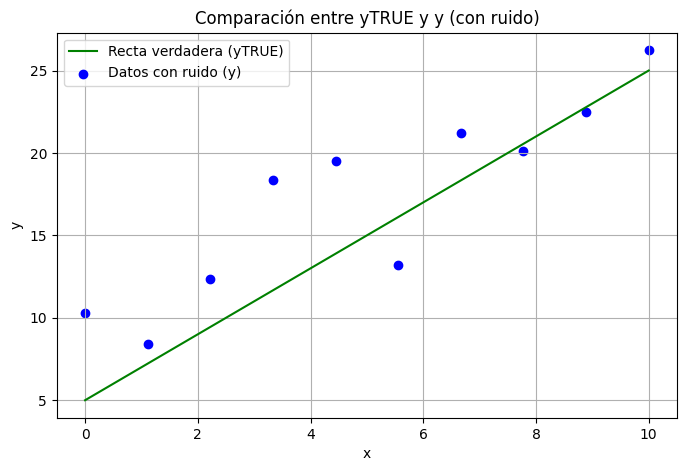

la varianza de x es:  10.185185185185185  y la varianza de y es:  30.442958415603123
la covarianza entre ambas es: 
[[11.31687243 17.43514426]
 [17.43514426 33.82550935]]


In [ ]:
#3) Calculá la varianza de  x  e  y , la covarianza y el coeficiente de correlación

xTRUE = np.linspace(0,10,10)
yTRUE = m_real * xTRUE + b_real

sigma = 3

np.random.seed(0)
y = yTRUE + np.random.normal(0,sigma, size = xTRUE.shape)

x = xTRUE

plt.figure(figsize=(8, 5))
plt.plot(xTRUE, yTRUE, label='Recta verdadera (yTRUE)', color='green')
plt.scatter(x, y, label='Datos con ruido (y)', color='blue')
plt.legend()
plt.title("Comparación entre yTRUE y y (con ruido)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

xvar = np.var(xTRUE)
yvar = np.var(y)
print("la varianza de x es: ",xvar, " y la varianza de y es: ", yvar )
print("la covarianza entre ambas es: ")
print(np.cov(xTRUE,y))

In [ ]:
#4)Escribí una función que dado un valor propuesto para m y b calcule SSE para estos datos

def sse(xTRUE,yTRUE,m,b):
    y_pred = recta(xTRUE,m,b)
    return np.sum((yTRUE - y_pred)**2)
print(sse(xTRUE,yTRUE,m,b))

0.0


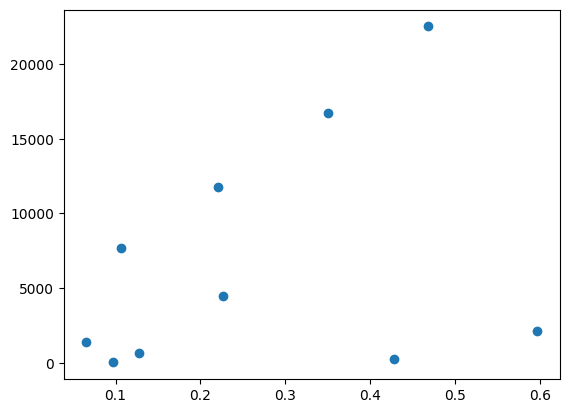

In [ ]:
#5)Fijando b en el valor simulado, graficá el valor de SSE en función de m. Fijando m en el valor simulado, graficá el valor de SSE en función de b.

m_val = np.linspace(0,10,10)
sse_m = [sse(xTRUE,yTRUE,m,b) for m in m_val]
plt.scatter(mran,sse_m)
plt.show()

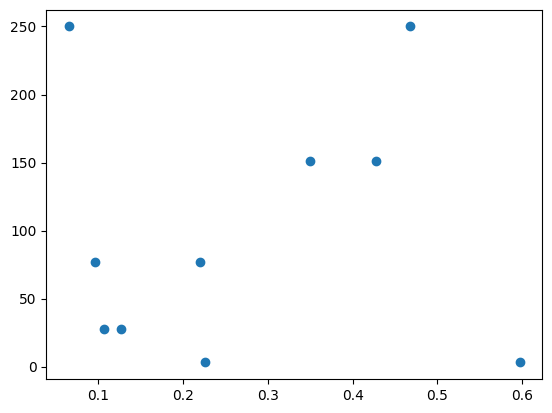

In [ ]:
b_val = np.linspace(0,10,10)
sse_m = [sse(xTRUE,yTRUE,m,b) for b in b_val]
plt.scatter(mran,sse_m)
plt.show()

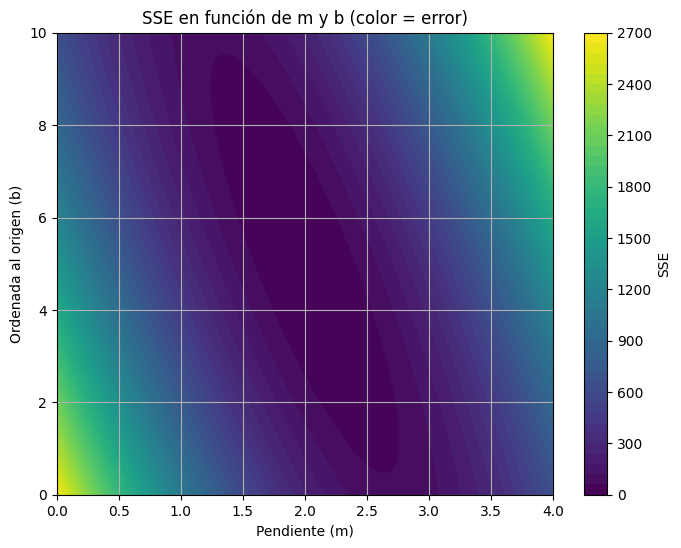

In [ ]:
#6) Graficá el valor de SSE en función de  m  y  b  con un gráfico de mayor dimensionalidad.

m_vals = np.linspace(0, 4, 100)
b_vals = np.linspace(0, 10, 100)

# Crear grilla
M, B = np.meshgrid(m_vals, b_vals)

# Calcular SSE para cada combinación
SSE = np.zeros_like(M)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        y_pred = M[i, j] * xTRUE + B[i, j]
        SSE[i, j] = np.sum((yTRUE - y_pred) ** 2)

# Gráfico de contorno (color como Z)
plt.figure(figsize=(8, 6))
contour = plt.contourf(M, B, SSE, levels=50, cmap='viridis')
plt.colorbar(contour, label='SSE')
plt.xlabel('Pendiente (m)')
plt.ylabel('Ordenada al origen (b)')
plt.title('SSE en función de m y b (color = error)')
plt.grid(True)
plt.show()

### Ajuste (y regresión)

#### Usando la formula para pendiente y ordenada

1. Escribí una función que calcule los valores de $m$ y $b$ a partir de $x$ e $y$ (suponiendo un $\sigma$ uniforme) siguiendo las ecuaciones vistas en clase.
2. Ajustá los datos con ruido y compará los resultados obtenidos con los valores de $m$ y $b$ utilizados para simular los datos. ¿Son iguales? ¿Están cerca?
3. Grafica los resultados.

#### Usando polynomial fit de numpy

Usando la función **numpy.polynomial.polynomial.Polynomial.fit** de numpy (también está la función **numpy.polyfit** que es equivalente)
1. Ajustá los datos con ruido y compará los resultados obtenidos con los valores de $m$ y $b$ utilizados para simular los datos. ¿Son iguales? ¿Están cerca?
2. Grafica los resultados.
3. ¿Qué pasa cuando cambias $\sigma$?
4. ¿Que pasa cuando a algunos datos les pones un sigma chico y a otros un sigma grande?
5. ¿Cómo se calculan las incertezas para $m$ y $b$? Cuando hagas esto, compara con los graficos de SSE vs $m$ o $b$.

**Extra**: Generá datos con la ecuación de una parábola y ajustalos con una recta. ¿Qué pasa? ¿Cómo cambian los residuos?  ¿Cómo

#### Usando curve_fit de scipy

Usando la función **curve_fit** de scipy
1. Ajustá los datos con ruido y compará los resultados obtenidos con los valores de $m$ y $b$ utilizados para simular los datos. ¿Son iguales? ¿Están cerca?
2. Grafica los resultados.
3. ¿Cómo se calculan las incertezas para $m$ y $b$? Cuando hagas esto, compara con los graficos de SSE vs $m$ o $b$.


**Extra Bonus**: *curve_fit* realiza una busqueda iterativa del valor que minimiza el SSE. En cambio **Polynomial fit** aprovecha que la ecuación es lineal en los coeficientes para encontrar la solución es mejor para este caso. Por debajo, usa **np.linalg.lstsq** para armar manualmente la [matriz](https://en.wikipedia.org/wiki/Design_matrix). Implementá un ajuste lineal usando esta idea.

In [ ]:
def calcular_m_b(x,y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)
  m = np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
  b = y_mean - m*x_mean
  return m,b

m,b = calcular_m_b(x,y)
print(m,b)

1.896931066639558 4.252644783605271


In [ ]:
yruido = y + np.random.normal(0,sigma, size = x.shape)

mruido,bruido = calcular_m_b(x,yruido)
print(mruido,bruido)

1.7537691029529794 4.409056246569694


## Parsimonia

Se puede usar [F-test](https://en.wikipedia.org/wiki/F-test) (Ver sección Regression problems) para comparar un modelo simple con uno mas complejo.
1. ¿Cuál es la hipótesis nula?
2. Simulá y grafíca datos con ruido usando un la funcion $ 0.5 x^2 - x + 2 $ con 30 puntos uniformemente expaciados para $x$ entre -3 y 3.
3. Suma ruido normal con media 0 y desviación estandar 1. Graficá el resultado
4. Usando *polyfit* ajustá con distintos polinomios, desde grado 0 hasta 4 inclusive. Grafica todos los resultados. (Podrías usar *curve_fit* pero *polyfit* usa internamente *lstsq* y por lo tanto es mejor.)
5. ¿Cómo cambia el SSE a medida que se aumenta el grado del polinomio?. Grafica el resultado
6. Sin utilizar que sabes que el polinomio es de grado 2, utilizá el test para averiguar hasta que grado llegar.


## Problema Extra: Ajuste de una combinación de funciones trigonométricas

1. Simulá y graficá datos usando la función $y = 2 \cos(x) - \sin(x)$ con valores para $x$ uniformemente distribuidos entre 0 y 2 $\pi$.
2. Sumá ruido normal con media 0 y desviación estándar 0.5. Graficá los puntos resultantes.
3. Usando `np.linalg.lstsq`, ajustá los datos al modelo $A \cos(x) + B \sin(x)$
4. Graficá los datos ruidosos junto con la curva ajustada.

También podrías usar `curve_fit`, pero como el modelo es lineal en los parámetros $A$ y $B$ conviene usar `np.linalg.lstsq`, que resuelve el ajuste de manera directa y eficiente. Sin embargo, probá *curve_fit*.

### Pinguinos

Un investigador patagónico sospecha que el largo y ancho del pico están correlacionados. Usando el dataset de pinguinos genera un gráfico de dispersión que visualice esta relación.

1. Calcular el coeficiente de correlación
2. Escribí un modelo linear para vincular estas dos magnitudes.
3. Ajustá los datos

**Para pensar en grupo**:
- ¿Qué evaluación hacen de los ajustes (residuos, $r^2$, etc)?
- ¿Debo separar los datos por especie?
- ¿Hay otra magnitudes que tengan relaciones similares?

**Extra**: Calculá nuevas columnas en las que les restas el valore medio correspondiente (ej. `x_nueva = x - mean(x)` ), y volvé a ajustar `x_nueva` e `y_nueva`. ¿Qué interpretación tienen ahora $m$ y $b$ del nuevo modelo? Discutir las ventajas y desventajas de hacer esto. Calcular el coeficiente de determinación para este nuevo modelo y comparar.

*Nota*: Seaborn tiene una forma muy simpática de generar un grafico con una linea de tendencia. Lamentablemente, es tán simpático como inutil.
```python
(
    so.Plot(data=df, x="bill_length_mm", y="bill_depth_mm", color="species")
    .add(so.Dots())
    .add(so.Lines(), so.PolyFit(order=1))
)
```